In [1]:
!pip install imagehash

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 296 kB 8.5 MB/s 


In [2]:
import os
import cv2
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image
import imagehash
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from google.colab.patches import cv2_imshow

In [ ]:
!rm -rf  "/content/images"

In [3]:
import datetime
 
# create video capture object

data = cv2.VideoCapture('/content/demo_2.mp4')
 
# count the number of frames and frames per secound
frames = data.get(cv2.CAP_PROP_FRAME_COUNT)
fps = data.get(cv2.CAP_PROP_FPS)
 
# calculate duration of the video
seconds = round(frames / fps)
video_time = datetime.timedelta(seconds=seconds)
print(seconds,frames,(seconds/frames))
print(f"duration in seconds: {seconds}")
print(f"video time: {video_time}")

20 593.0 0.03372681281618887
duration in seconds: 20
video time: 0:00:20


placing one image on top of the other

In [ ]:
def overlap_images(l):
  location='/content/images/'

  img=cv2.imread(location+str(l[0]))
  for i in range(1,len(l)):

    #img1 = cv2.imread('forest.png')
    img2 = cv2.imread(location+str(l[i]))
    dst = cv2.addWeighted(img, 0.5, img2, 0.7, 0)

    img_arr = np.hstack((img, img2))
    # cv2.imshow('Input Images',img_arr)
    # cv2.imshow('Blended Image',dst)
  cv2.waitKey(0)
  cv2.destroyAllWindows()
  
  return dst

  


In [ ]:
x=overlap_images(l[0:4])

In [ ]:
x

array([[[120, 105, 107],
        [114,  99, 100],
        [102,  87,  88],
        ...,
        [ 12,  96,  71],
        [ 16, 108,  82],
        [ 17, 113,  86]],

       [[124, 110, 111],
        [120, 106, 108],
        [114, 100, 102],
        ...,
        [ 20, 103,  78],
        [ 22, 112,  86],
        [ 22, 114,  88]],

       [[119, 106, 108],
        [117, 104, 106],
        [118, 105, 108],
        ...,
        [ 26, 108,  82],
        [ 27, 111,  85],
        [ 23, 111,  84]],

       ...,

       [[239, 239, 255],
        [238, 239, 255],
        [238, 239, 255],
        ...,
        [250, 246, 248],
        [250, 246, 248],
        [250, 246, 248]],

       [[238, 239, 255],
        [238, 239, 255],
        [238, 239, 255],
        ...,
        [250, 246, 248],
        [250, 246, 248],
        [249, 246, 248]],

       [[239, 239, 255],
        [239, 239, 255],
        [239, 239, 255],
        ...,
        [250, 246, 248],
        [250, 246, 248],
        [249, 246, 248]]

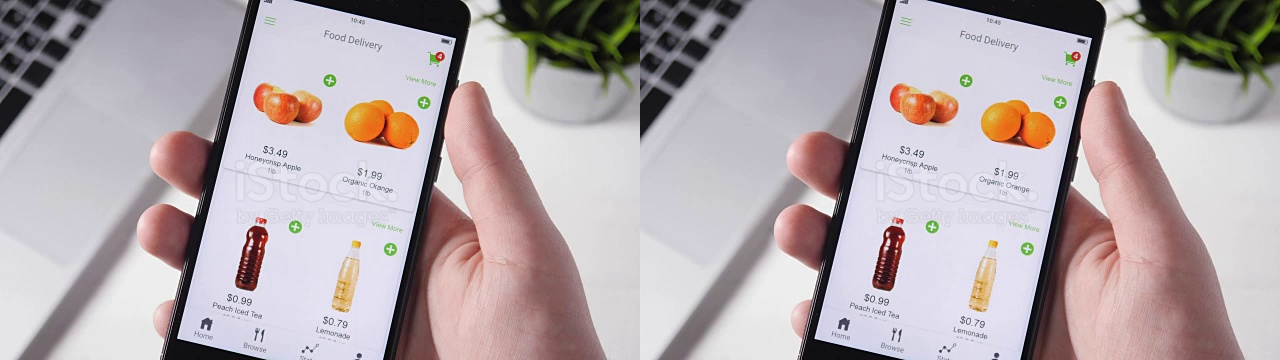

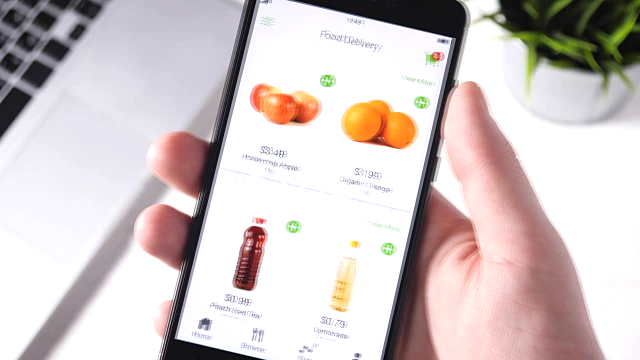

In [ ]:
from google.colab.patches import cv2_imshow
img1 = cv2.imread('/content/images/image0.jpg')
img2 = cv2.imread('/content/images/image29.jpg')
dst = cv2.addWeighted(img1, 0.5, img2, 0.7, 0)
img_arr = np.hstack((img1, img2))
# print(img_arr)
cv2_imshow(img_arr)
cv2_imshow(dst)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
x

array([[[120, 105, 107],
        [114,  99, 100],
        [102,  87,  88],
        ...,
        [ 12,  96,  71],
        [ 16, 108,  82],
        [ 17, 113,  86]],

       [[124, 110, 111],
        [120, 106, 108],
        [114, 100, 102],
        ...,
        [ 20, 103,  78],
        [ 22, 112,  86],
        [ 22, 114,  88]],

       [[119, 106, 108],
        [117, 104, 106],
        [118, 105, 108],
        ...,
        [ 26, 108,  82],
        [ 27, 111,  85],
        [ 23, 111,  84]],

       ...,

       [[239, 239, 255],
        [238, 239, 255],
        [238, 239, 255],
        ...,
        [250, 246, 248],
        [250, 246, 248],
        [250, 246, 248]],

       [[238, 239, 255],
        [238, 239, 255],
        [238, 239, 255],
        ...,
        [250, 246, 248],
        [250, 246, 248],
        [249, 246, 248]],

       [[239, 239, 255],
        [239, 239, 255],
        [239, 239, 255],
        ...,
        [250, 246, 248],
        [250, 246, 248],
        [249, 246, 248]]

In [ ]:
l[0:4]

['image0.jpg', 'image29.jpg', 'image58.jpg', 'image87.jpg']

Takes the input from overlap_image and stores it for similarity checking

In [ ]:
def check_frames_extraction(file_path):
  count =0
  result=[]
  # Opens the Video file
  cap= cv2.VideoCapture(file_path)
  fps = cap.get(cv2.CAP_PROP_FPS)
  #frame_count = cap.get(cv2.CAP_PROP_FRAME_COUNT)
  i=0
  x=""
  name=""
  l=[]
  mid_r=seconds//2
  end=seconds
  fcount=0

  l1=[]
  l2=[]
  l3=[]

  number_of_frames=4

  while(cap.isOpened()):
      ret, frame = cap.read()
      if ret == False:
          break
      if(count%(math.floor(frames/seconds))==0):
        fcount=fcount+1

        if(fcount<=number_of_frames):
            x="/content/images/"+"image"+str(i)+".jpg"
            name="image"+str(i)+".jpg"
            # result.append(x)
            l1.append(name)
            cv2.imwrite(x,frame)
            
            if(len(l1)==4):
              x1=overlap_images(l1)
              cv2.imwrite("/content/final_images/image1.jpg", x1)
              #cv2.imwrite(x1,frame)
              l.append("image1.jpg")
            

        elif(fcount in range(mid_r,mid_r+number_of_frames)):
            x="/content/images/"+"image"+str(i)+".jpg"
            name="image"+str(i)+".jpg"
            # result.append(x)
            cv2.imwrite(x,frame)
            l2.append(name)

            if(len(l2)==4):
              x2=overlap_images(l2)
              cv2.imwrite("/content/final_images/image2.jpg", x2)
              #cv2.imwrite(x2,frame)
              l.append("image2.jpg")
            

      
        elif(fcount in range(end-number_of_frames,end)):
            x="/content/images/"+"image"+str(i)+".jpg"
            name="image"+str(i)+".jpg"
            # result.append(x)
            l3.append(name)
            cv2.imwrite(x,frame)
            
            if(len(l3)==4):
              x3=overlap_images(l3)
              cv2.imwrite("/content/final_images/image3.jpg", x3)
              #cv2.imwrite(x3,frame)
              l.append("image3.jpg")
            

      count+=1
      

      i+=1


  cap.release()
  cv2.destroyAllWindows()


  return l


In [ ]:
l=check_frames_extraction("/content/demo_2.mp4")

In [ ]:
l

['image1.jpg', 'image2.jpg', 'image3.jpg']

checking similarity uses norm() function in opencv

In [ ]:
import cv2
import numpy as np
def compare_similar_norm(l):
  location='/content/final_images/'

  # A = np.zeros((height,width,3), np.uint8)

  # B = np.zeros((height,width,3), np.uint8)
  # B[0:width//2,:,:] = (0,0,255)

  img1=cv2.imread(location+str(l[0]))
  height = img1.shape[0]
  width = img1.shape[1]
  cv2_imshow(img1)
  for i in range(1,len(l)):
    img2=cv2.imread(location+str(l[i]))
    

    errorL2 = cv2.norm( img1, img2, cv2.NORM_L2)

    similarity = 1 - errorL2 / ( height * width )
    
    print('Similarity '+str(i)+'= ',similarity)

    cv2_imshow(img2)


  cv2.waitKey(0)

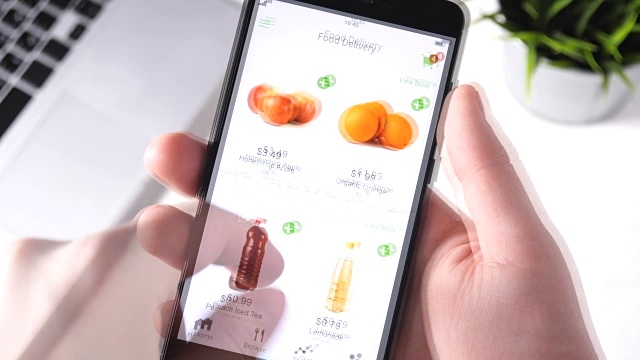

Similarity 1=  0.8457066708218215


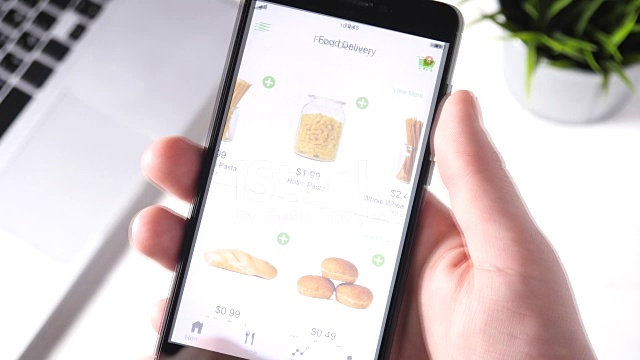

Similarity 2=  0.8369331327105783


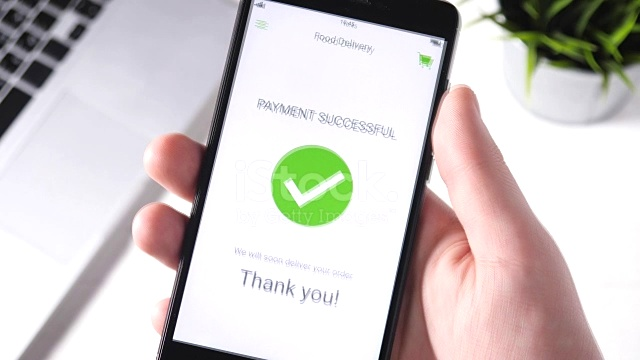

In [ ]:
result=compare_similar_norm(l)

checking similarity using comparehist()

In [ ]:
from google.colab.patches import cv2_imshow


def compare_similar_hist(l):

  location='/content/final_images/'


  base = cv2.imread(location+str(l[0]))
 
  # test2 = cv2.imread('/content/final_images/image3.jpg')

  hsv_base = cv2.cvtColor(base, cv2.COLOR_BGR2HSV)


  for i in range(1,len(l)):
    
    test = cv2.imread(location+str(l[i]))

    
    hsv_test = cv2.cvtColor(test, cv2.COLOR_BGR2HSV)
    # hsv_test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2HSV)

    h_bins = 50
    s_bins = 60
    histSize = [h_bins, s_bins]
    h_ranges = [0, 180]
    s_ranges = [0, 256]
    ranges = h_ranges + s_ranges
    channels = [0, 1]

    hist_base = cv2.calcHist([hsv_base], channels, None, histSize, ranges, accumulate=False)
    cv2.normalize(hist_base, hist_base, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    hist_test = cv2.calcHist([hsv_test], channels, None, histSize, ranges, accumulate=False)
    cv2.normalize(hist_test, hist_test, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)
    # hist_test2 = cv2.calcHist([hsv_test2], channels, None, histSize, ranges, accumulate=False)
    # cv2.normalize(hist_test2, hist_test2, alpha=0, beta=1, norm_type=cv2.NORM_MINMAX)

    compare_method = cv2.HISTCMP_CORREL

    base_base = cv2.compareHist(hist_base, hist_base, compare_method)
    base_test = cv2.compareHist(hist_base, hist_test, compare_method)
    # base_test2 = cv2.compareHist(hist_base, hist_test2, compare_method)

    # print('base_base Similarity = ', base_base)
    print('base_test Similarity = ', base_test)
    # print('base_test2 Similarity = ', base_test2)

    # cv2_imshow(base)
    # cv2_imshow(test)
    # cv2_imshow(test2)
    cv2.waitKey(0)

In [ ]:
result=compare_similar_hist(l)

base_test Similarity =  0.9864200283462212
base_test Similarity =  0.983216784582435


using another video

In [ ]:
l=check_frames_extraction("/content/Saving dolphines.mp4")

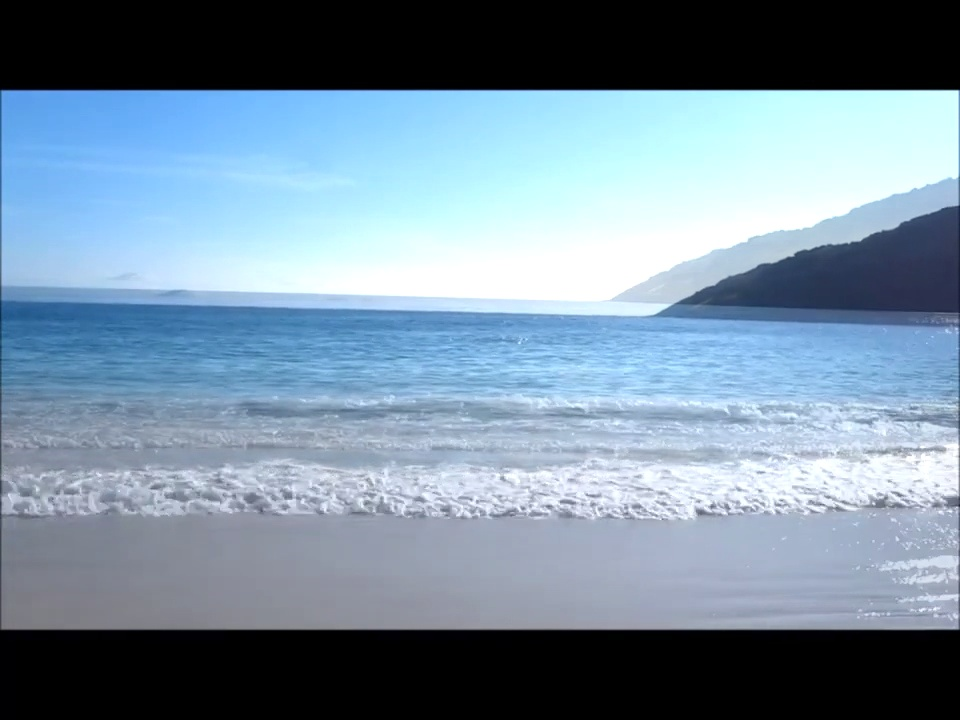

Similarity 1=  0.913743258039192


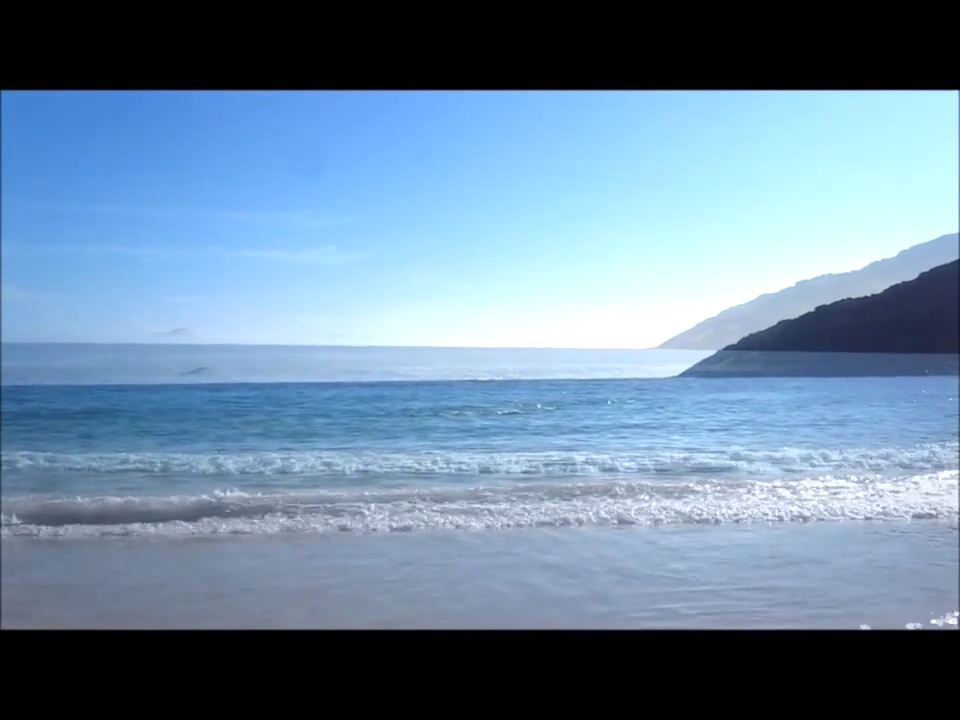

Similarity 2=  0.8985843658188694


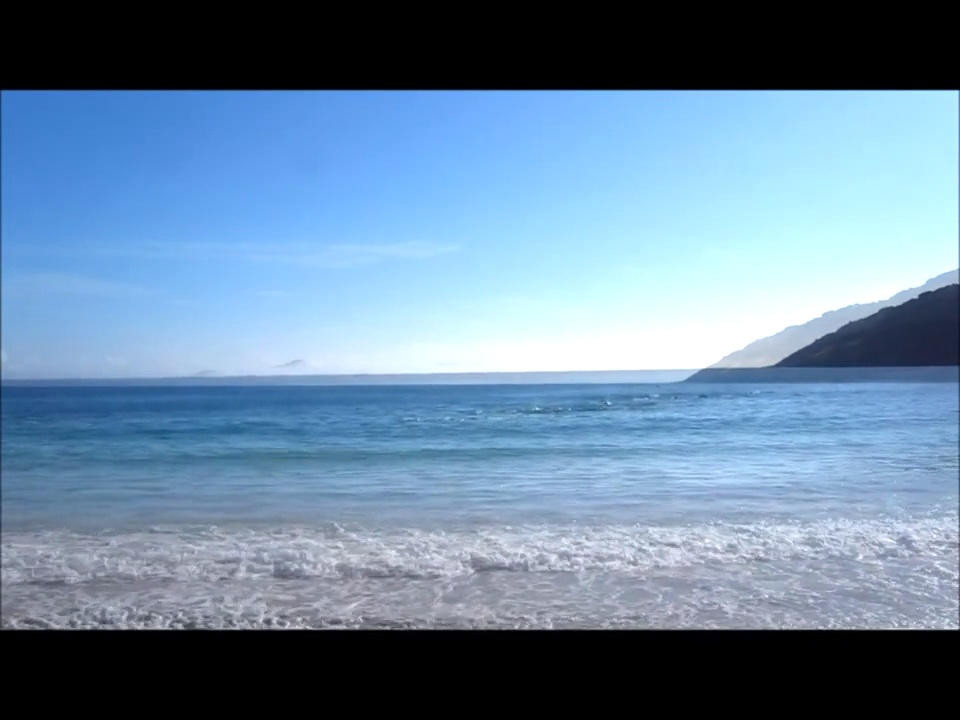

In [ ]:
result=compare_similar_norm(l)

In [ ]:
result=compare_similar_hist(l)

base_test Similarity =  0.9571435734588678
base_test Similarity =  0.9761990373862192


checking similarity using imagehash

In [ ]:
def similarity_index(prev_img_path,next_img_path):
  hash1 = imagehash.average_hash(Image.open(prev_img_path))
  hash2 = imagehash.average_hash(Image.open(next_img_path))
  diff = hash1 - hash2
  x = abs(diff)
  y=1/(1+(2.71)**(-x))
  if(y>0.99999):
    #print(y)
    return True
  else:
    
    return False

In [ ]:
hash1 = imagehash.average_hash(Image.open('/content/images/image0.jpg'))
hash2 = imagehash.average_hash(Image.open('/content/images/image1020.jpg'))
diff = hash1 - hash2
x = abs(diff)
y=1/(1+x)
print(y)
print(x)

0.08333333333333333
11


using hash function for similarity check using sigmoid function

In [ ]:
hash1 = imagehash.average_hash(Image.open('/content/images/image0.jpg'))
hash2 = imagehash.average_hash(Image.open('/content/images/image1020.jpg'))
diff = hash1 - hash2
x = abs(diff)
y=1/(1+(2.71)**(-x))
print(y)
print(x)

0.9999827284903574
11


using subtraction for similarity check

In [ ]:
img1=cv2.imread('/content/images/image0.jpg')
img2=cv2.imread('/content/images/image1020.jpg')
diff=cv2.subtract(img1,img2)
b,g,r=cv2.split(diff)
if(cv2.countNonZero(b)==0 and cv2.countNonZero(g)==0 and cv2.countNonZero(r)==0):
  print("same")
else:
  print("diff")


diff
